In [19]:
%matplotlib inline
import numpy as np
import yfinance as yf
from arch import arch_model

import matplotlib.pyplot as plt
plt.rc("figure", figsize=(16, 6))
plt.rc("font", family="sans-serif")
plt.rc("font", size=14)
# After the imports, grab some data.

data = yf.download("AAPL", start="2020-01-01", end="2022-07-31")
# Compute the simple returns and multiply by 100 to avoid the scaling warning from arch_model.

adjusted_closes = data['Adj Close']
returns = 100 * adjusted_closes.pct_change().dropna()

[*********************100%***********************]  1 of 1 completed


In [20]:
model = arch_model(returns)

In [21]:
res = model.fit()

#The library uses an iterative algorithm called maximum likelihood estimation to fit the model parameters. 
# Details of each iteration prints to the screen.

Iteration:      1,   Func. Count:      6,   Neg. LLF: 2574.0335634112607
Iteration:      2,   Func. Count:     15,   Neg. LLF: 22488.9960170466
Iteration:      3,   Func. Count:     22,   Neg. LLF: 1791.5799924254077
Iteration:      4,   Func. Count:     29,   Neg. LLF: 1631.7193369352644
Iteration:      5,   Func. Count:     36,   Neg. LLF: 1393.0470835710155
Iteration:      6,   Func. Count:     42,   Neg. LLF: 1388.0892173599245
Iteration:      7,   Func. Count:     47,   Neg. LLF: 1388.0885704775703
Iteration:      8,   Func. Count:     52,   Neg. LLF: 1388.0885329948767
Iteration:      9,   Func. Count:     57,   Neg. LLF: 1388.0885310814567
Iteration:     10,   Func. Count:     61,   Neg. LLF: 1388.0885310801214
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1388.0885310814567
            Iterations: 10
            Function evaluations: 61
            Gradient evaluations: 10


In [22]:
print(res.summary())

                     Constant Mean - GARCH Model Results                      
Dep. Variable:              Adj Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -1388.09
Distribution:                  Normal   AIC:                           2784.18
Method:            Maximum Likelihood   BIC:                           2802.08
                                        No. Observations:                  649
Date:                Thu, Feb 02 2023   Df Residuals:                      648
Time:                        02:12:54   Df Model:                            1
                                Mean Model                                
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.2211  7.859e-02      2.813  4.909e-03 [6.704e-0

It shows the statistical significance of each of the coefficients. 
They all have very small p-values. We can assume the results are not due to random chance.


In [31]:
def sqrt(x):
    last_guess= x/2.0
    while True:
        guess= (last_guess + x/last_guess)/2
        if abs(guess - last_guess) < .0001: # example threshold
            return guess
        last_guess= guess

In [44]:
# get the variance forecast
forecast = res.forecast(horizon=1, reindex=False)
variance_forecast = forecast.variance.iloc[-1][0]

# compute the annualized volatility forecast
# volatility_forecast = np.sqrt(variance_forecast)
volatility_forecast = sqrt(variance_forecast)

# annualized_volatility_forecast = volatility_forecast * np.sqrt(252) / 100
annualized_volatility_forecast = volatility_forecast * sqrt(252) / 100

print(volatility_forecast)
print(annualized_volatility_forecast)

2.074716463378609
0.32935102818428014


ValueError: annualize not recognized

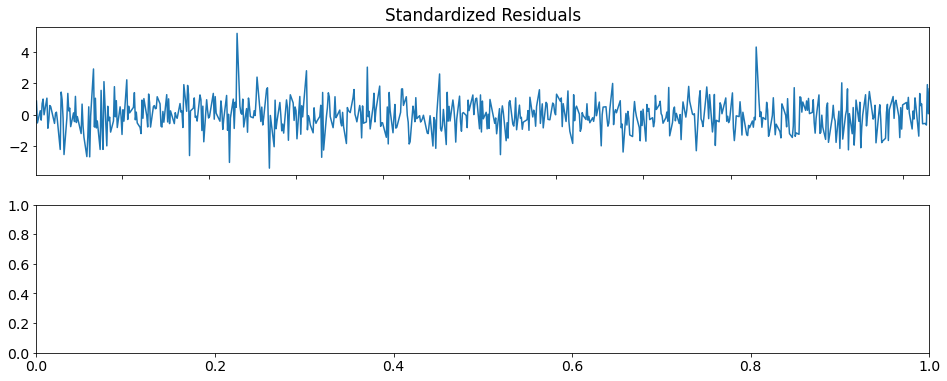

In [47]:
# visualize the standardized residuals and conditional volatility.
fig = res.plot("0")

# Find a mispricing

Compare the standard deviation of returns to the GARCH volatility forecast. There’s a 10.7% difference. Use an options calculator and value an option using both volatility inputs.

Find market mispricings like the pros with GARCH
The value of a call option using the GARCH forecast for volatility is $10.12.

Find market mispricings like the pros with GARCH
The value of a call option using historical volatility is $11.22.

If you believe the GARCH model is more accurate than the historical volatility in forecasting volatility, you’d sell this call option.